In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# 目的
本ノートブックでは、線形回帰を行うことを前提とした、探索的データ解析（Exploratory Data Analysis:EDA）の練習を行う。

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import platform


#invite people for the Kaggle party
from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
from scipy import stats

from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#import missingno as msno

import eda_preprocess as ep

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


if platform.system()=="Windows":
    #windowsの場合
    data_dirname = r"C:\Users\yamau\OneDrive\ドキュメント\Python Scripts\AI\kaggle\house-prices-advanced-regression-techniques\data"
elif platform.system()=="Linux":
    #Linuxの場合
    data_dirname=r"./data"
else:    
    # macの場合
    data_dirname = r'/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques'

# データ取得および前処理の一括処理

In [6]:
#自作前処理の場合
train, test_data, y_test = ep.reset_data(data_dirname)
X_train, y_train, X_valid, y_valid, X_test, y_test = ep.preprocess_selfmade(train, test_data, y_test)
#X_train, y_train, X_valid, y_valid, X_test = ep.preprocess_for_xgb(train, test_data)

LotFrontage
MasVnrArea


# 線形モデルの作成
以下のモデルで線形回帰を行う。
- 正則化なしの線形回帰
- リッジ回帰
- Lasso回帰

## 正則化なしの線形回帰

MSE_train=0.021734360273066897, r2_train=0.8656020879725915
MSE_test=0.01888625559795034, r2_test=0.8755629794537485


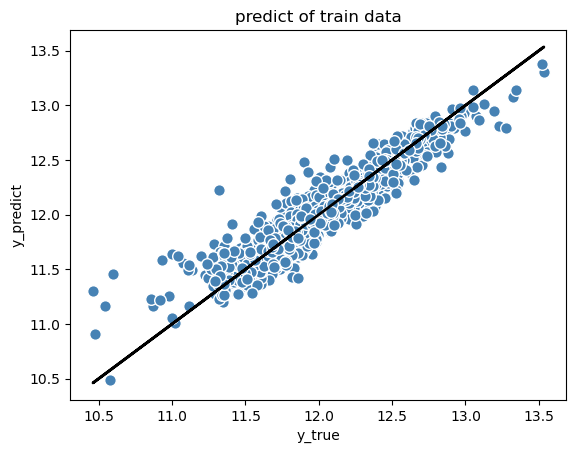

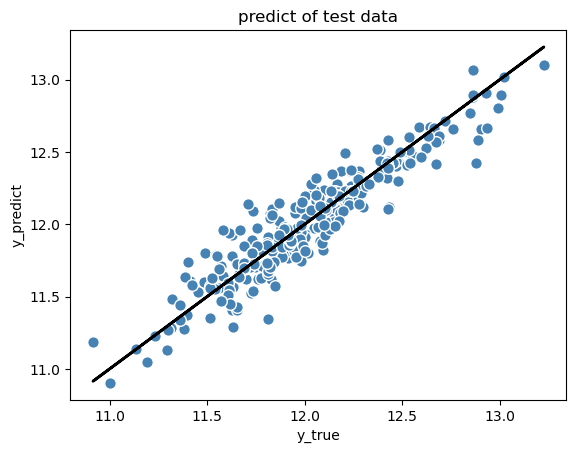

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.svm import SVR

slr = LinearRegression()
slr.fit(X_train, y_train)

eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, slr)
eva_class.show_result()

## リッジ回帰
クロスバリデーションに基づくリッジ回帰

alpha= 1.0
MSE_train=0.02173780361537335, r2_train=0.8655807955116878
MSE_test=0.018829840893272873, r2_test=0.8759346824484819


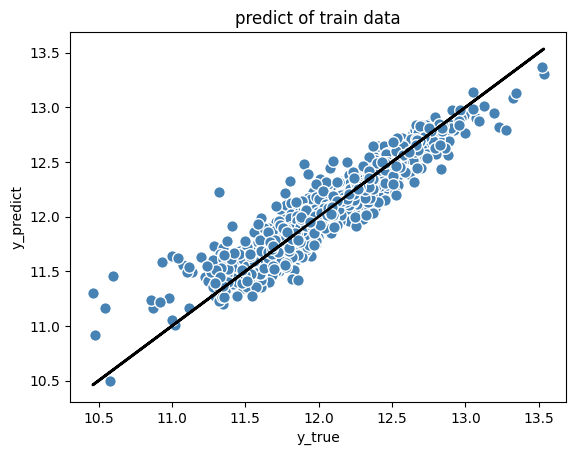

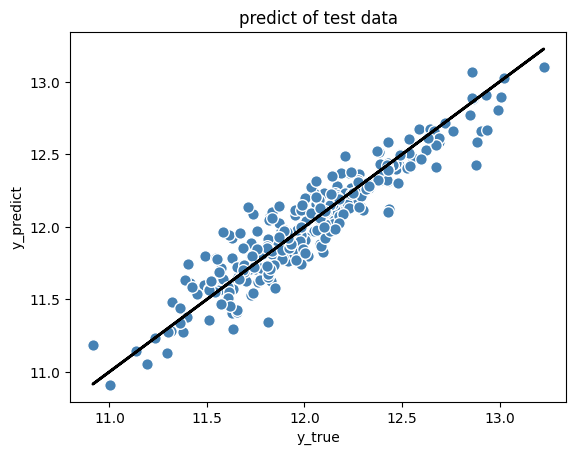

In [8]:
slr = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
slr.fit(X_train, y_train)
print("alpha=", slr.alpha_)

eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, slr)
eva_class.show_result()

## Lasso回帰

alpha= 0.01
MSE_train=0.02488216492017675, r2_train=0.8461371317131708
MSE_test=0.02056613333113216, r2_test=0.8644946668962384


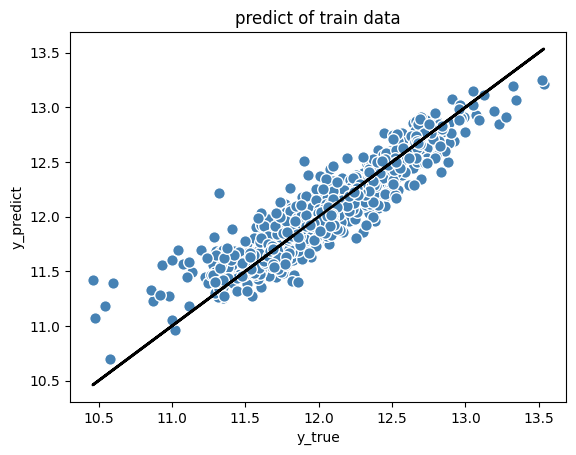

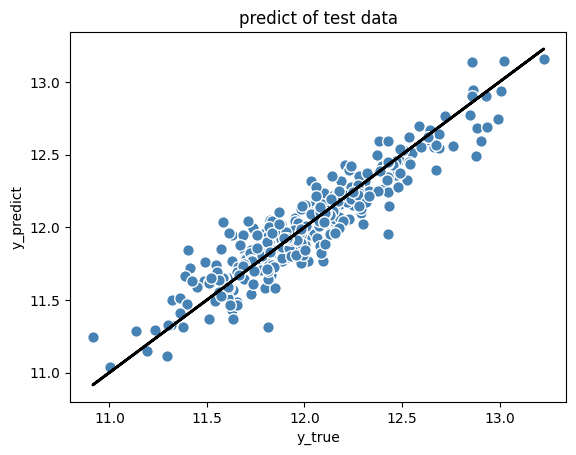

In [9]:
slr = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
slr.fit(X_train, y_train)
print("alpha=", slr.alpha_)

eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, slr)
eva_class.show_result()

# 非線形モデルの作成
- SV回帰
- ランダムフォレスト回帰
- ニューラルネットワーク

### 線形カーネルを使った場合

In [11]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

# tuned_parameters = [
#     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
# ]

# gscv = GridSearchCV(SVR(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
# gscv.fit(X_train, y_train)

# #一番スコア悪い&良い奴を出す
# #params_min,_,_ = gscv.grid_scores_[np.argmin([x[1] for x in gscv.grid_scores_])]
# params_min = gscv.best_params_
# #reg_min = SVR(kernel=params_min['kernel'], C=params_min['C'], gamma=params_min['gamma'])
# reg_min = SVR(kernel=params_min['kernel'], C=params_min['C'])

# reg_max = gscv.best_estimator_
# #全トレーニングデータを使って再推計
# reg_min.fit(X_train, y_train)


# show_result(X_train, y_train, X_test, y_test, reg_min)

### rbfカーネルを使った場合

In [181]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
    {'kernel': ['rbf'], 'gamma': [10**i for i in range(-4,3)], 'C': [10**i for i in range(-3, 4)]}
]

gscv = GridSearchCV(SVR(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [182]:
print(gscv.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


MSE_train=0.012555761536838237, r2_train=0.9223594293430294
MSE_test=0.09584959815311594, r2_test=0.3684699249742407


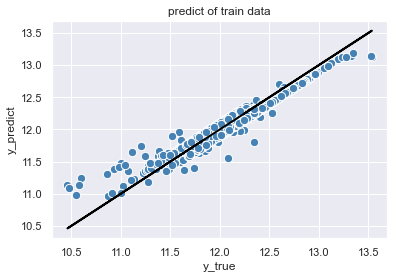

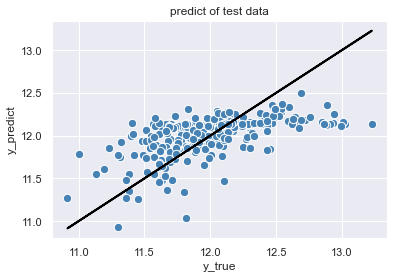

In [183]:
#一番スコア悪い&良い奴を出す
#params_min,_,_ = gscv.grid_scores_[np.argmin([x[1] for x in gscv.grid_scores_])]
params_min = gscv.best_params_
reg_min = SVR(kernel=params_min['kernel'], C=params_min['C'], gamma=params_min['gamma'])

reg_max = gscv.best_estimator_
#全トレーニングデータを使って再推計
reg_min.fit(X_train, y_train)

eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, reg_min)
eva_class.show_result()

## ランダムフォレスト回帰

In [184]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

tuned_parameters = [
    {'n_estimators': [10, 50, 100], 'max_features': ["sqrt", "log2"], 'max_depth': [10, 50, 100]}
]

gscv = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 50, 100],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [185]:
print(gscv.best_params_)

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}


MSE_train=0.0030731182789864113, r2_train=0.9809968789087917
MSE_test=0.01884877862101314, r2_test=0.8758099062903021


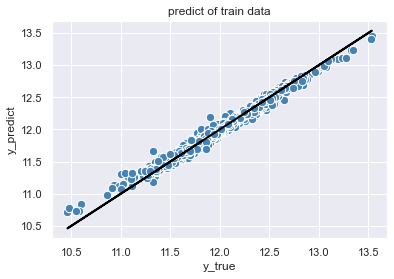

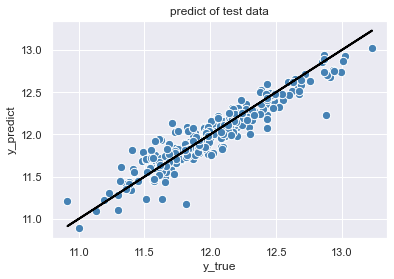

In [186]:
#一番スコア悪い&良い奴を出す
#params_min,_,_ = gscv.grid_scores_[np.argmin([x[1] for x in gscv.grid_scores_])]
params_min = gscv.best_params_
reg_min = RandomForestRegressor(max_depth=params_min["max_depth"], max_features=params_min["max_features"], n_estimators=params_min["n_estimators"])

reg_max = gscv.best_estimator_
#全トレーニングデータを使って再推計
reg_min.fit(X_train, y_train)

eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, reg_min)
eva_class.show_result()

# 勾配ブースティング木

In [12]:
from xgboost import XGBRegressor


tuned_parameters = [
    {
    'n_estimators': [10, 100, 1000], 
    #'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50, 100], 
    "learning_rate": [0.05, 0.1]
    }
]

gscv = GridSearchCV(XGBRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
gscv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid=[{'learning_rate': [0.05, 0.1],
                          'n_estimators': [10, 100, 1000]}],
             scoring='neg_mean_squared_error')

In [13]:
print(gscv.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


MSE_train=0.004626389480324228, r2_train=0.9713919766411692
MSE_test=0.020519141601374035, r2_test=0.8648042841632022


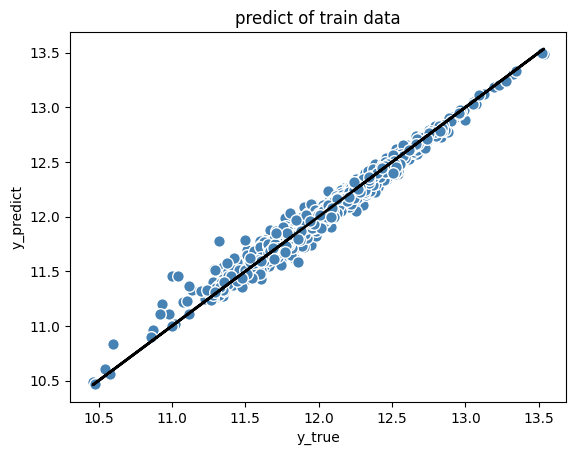

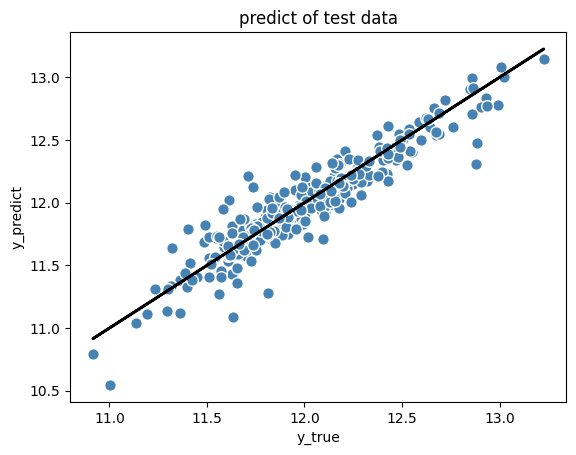

In [14]:

# Define the model
xgb =  XGBRegressor(learning_rate=gscv.best_params_["learning_rate"],
                    n_estimators=gscv.best_params_["n_estimators"]
                    #, max_depth=gscv.best_params_["max_depth"]
                    )

# Fit the model
xgb.fit(X_train, y_train)

eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, xgb)
eva_class.show_result()

# ニューラルネットワーク回帰

## pytorchでの実装

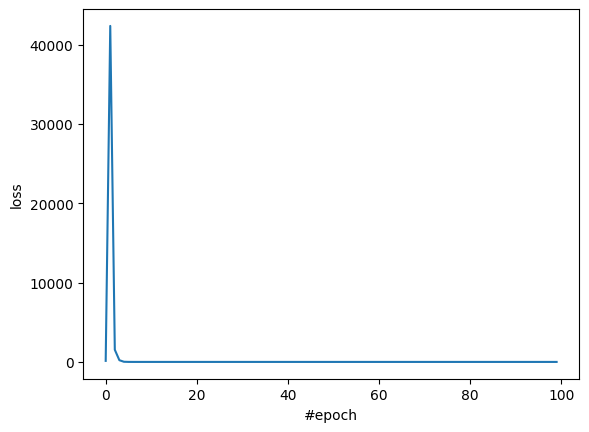

In [15]:
import torch

import torch
import torch.nn.functional
import torch.utils.data

class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(X_train.shape[1], 256)
    self.fc2 = torch.nn.Linear(256, 128)
    self.fc3 = torch.nn.Linear(128, 64)
    self.fc4 = torch.nn.Linear(64, 32)
    self.fc5 = torch.nn.Linear(32, 1)

  def forward(self, x):
    x = torch.nn.functional.relu(self.fc1(x))
    x = torch.nn.functional.relu(self.fc2(x))
    x = torch.nn.functional.relu(self.fc3(x))
    x = torch.nn.functional.relu(self.fc4(x))
    x = self.fc5(x)
    return x


num_epochs = 100

x_tensor = torch.from_numpy(X_train.values).float()
y_tensor = torch.from_numpy(y_train.values.reshape(-1, 1)).float()

net = Net()
net.train()
#optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
optimizer = torch.optim.RMSprop(net.parameters(), lr=0.001) 
criterion = torch.nn.MSELoss()

epoch_loss = []
for epoch in range(num_epochs):
  
  optimizer.zero_grad()
  y_pred = net(x_tensor)
  loss = criterion(y_pred, y_tensor)
  
  loss.backward()
  optimizer.step()
    
  epoch_loss.append(loss.data.numpy().tolist())

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('#epoch')
ax.set_ylabel('loss')
fig.show()

MSE_train=0.1972386787094284, r2_train=-0.21965708935271477
MSE_test=0.21523795627836723, r2_test=-0.4181514090411391


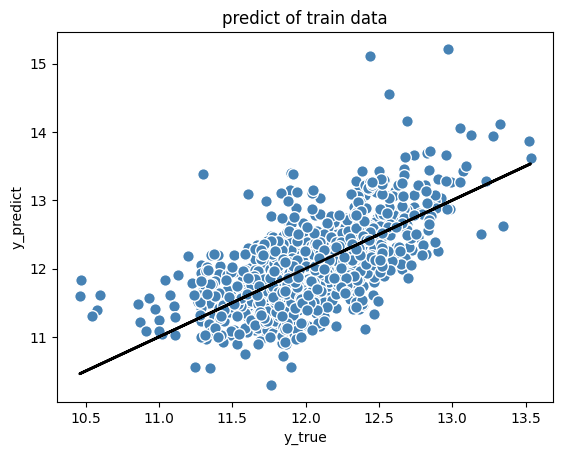

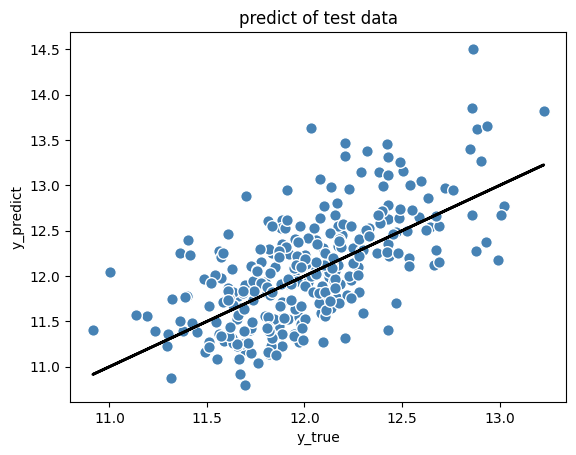

In [16]:
eva_class = ep.evaluation_show_pytorch(X_train, y_train, X_valid, y_valid, net)
eva_class.show_result()

## Optunaによるpytorchのパラメータチューニング

In [24]:
import optuna

In [25]:
study=optuna.create_study()

[I 2022-11-06 15:31:15,372] A new study created in memory with name: no-name-4b03e08c-fe5e-42aa-ae63-9d4cac9ea781


## hyperoptによるチューニング

In [8]:
from hyperopt import hp
from keras.callbacks import EarlyStopping
from keras.layers import ReLU, PReLU
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

# 基本となるパラメータ
base_param = {
    'input_dropout': 0.0,
    'hidden_layers': 3,
    'hidden_units': 96,
    'hidden_activation': 'relu',
    'hidden_dropout': 0.2,
    'batch_norm': 'before_act',
    'optimizer': {'type': 'adam', 'lr': 0.001},
    'batch_size': 64,
}

# 探索するパラメータの空間を指定する
# param_space = {
#     'input_dropout': hp.quniform('input_dropout', 0, 0.2, 0.05),
#     'hidden_layers': hp.quniform('hidden_layers', 2, 4, 1),
#     'hidden_units': hp.quniform('hidden_units', 32, 256, 32),
#     'hidden_activation': hp.choice('hidden_activation', ['prelu', 'relu']),
#     'hidden_dropout': hp.quniform('hidden_dropout', 0, 0.3, 0.05),
#     'batch_norm': hp.choice('batch_norm', ['before_act', 'no']),
#     'optimizer': hp.choice('optimizer',
#                            [{'type': 'adam',
#                              'lr': hp.loguniform('adam_lr', np.log(0.00001), np.log(0.01))},
#                             {'type': 'sgd',
#                              'lr': hp.loguniform('sgd_lr', np.log(0.00001), np.log(0.01))}]),
#     'batch_size': hp.quniform('batch_size', 32, 128, 32),
# }

param_space = {
    'input_dropout': hp.quniform('input_dropout', 0, 0.2, 0.05),
    'hidden_layers': hp.quniform('hidden_layers', 2, 4, 1),
    'hidden_units': hp.quniform('hidden_units', 32, 256, 32),
    'hidden_activation': hp.choice('hidden_activation', ['prelu', 'relu']),
    'hidden_dropout': hp.quniform('hidden_dropout', 0, 0.3, 0.05),
    'batch_norm': hp.choice('batch_norm', ['before_act']),
    'optimizer': hp.choice('optimizer',
                           [{'type': 'adam',
                             'lr': hp.loguniform('adam_lr', np.log(0.00001), np.log(0.01))},
                            {'type': 'sgd',
                             'lr': hp.loguniform('sgd_lr', np.log(0.00001), np.log(0.01))}]),
    'batch_size': hp.quniform('batch_size', 32, 128, 32),
}

In [9]:
from sklearn.model_selection import train_test_split

X_train_keras, X_valid_keras, y_train_keras, y_valid_keras = train_test_split(X_train, y_train,
                                                                    train_size=0.8,
                                                                    test_size=0.2,
                                                                    random_state=0)

In [10]:
# -----------------------------------
# パラメータチューニングの実行

from hyperopt import fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error


def score(params):
    # パラメータセットを指定したときに最小化すべき関数を指定する
    # モデルのパラメータ探索においては、モデルにパラメータを指定して学習・予測させた場合のスコアとする
    model = ep.MLP(params)
    model.fit(X_train_keras, y_train_keras, X_valid_keras, y_valid_keras)
    va_pred = model.predict(X_valid_keras)
    score = mean_squared_error(y_valid_keras, va_pred)
    print(f'params: {params}, logloss: {score:.4f}')

    # 情報を記録しておく
    history.append((params, score))

    return {'loss': score, 'status': STATUS_OK}


# hyperoptによるパラメータ探索の実行
max_evals = 10
trials = Trials()
history = []
fmin(score, param_space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# 記録した情報からパラメータとスコアを出力する
# trialsからも情報が取得できるが、パラメータを取得しにくい
history = sorted(history, key=lambda tpl: tpl[1])
best = history[0]
print(f'best params:{best[0]}, score:{best[1]:.4f}')


Epoch 1/200                                          

10/10 [==============================] - 4s 91ms/step - loss: 87.6584 - mae: 8.9988 - mse: 87.6584 - val_loss: 91.5292 - val_mae: 9.5439 - val_mse: 91.5292

Epoch 2/200                                          

10/10 [==============================] - 0s 27ms/step - loss: 11.2977 - mae: 2.7365 - mse: 11.2977 - val_loss: 66.8555 - val_mae: 8.1431 - val_mse: 66.8555

Epoch 3/200                                          

10/10 [==============================] - 0s 26ms/step - loss: 9.3834 - mae: 2.3810 - mse: 9.3834 - val_loss: 80.8847 - val_mae: 8.9763 - val_mse: 80.8847

Epoch 4/200                                          

10/10 [==============================] - 0s 25ms/step - loss: 4.7010 - mae: 1.7341 - mse: 4.7010 - val_loss: 81.3223 - val_mae: 9.0061 - val_mse: 81.3223

Epoch 5/200                                          

10/10 [==============================] - 0s 25ms/step - loss: 4.2335 - mae: 1.6663 - mse: 4.2335 - va

In [11]:
model = ep.MLP(best[0])
history = model.fit(X_train_keras, y_train_keras, X_valid_keras, y_valid_keras)

Epoch 1/200
10/10 [==============================] - 3s 62ms/step - loss: 115.9384 - mae: 10.4348 - mse: 115.9384 - val_loss: 87.4031 - val_mae: 9.3180 - val_mse: 87.4031
Epoch 2/200
10/10 [==============================] - 0s 19ms/step - loss: 13.8751 - mae: 3.0880 - mse: 13.8751 - val_loss: 63.3904 - val_mae: 7.9379 - val_mse: 63.3904
Epoch 3/200
10/10 [==============================] - 0s 18ms/step - loss: 10.4242 - mae: 2.5124 - mse: 10.4242 - val_loss: 73.4713 - val_mae: 8.5479 - val_mse: 73.4713
Epoch 4/200
10/10 [==============================] - 0s 17ms/step - loss: 4.5238 - mae: 1.6655 - mse: 4.5238 - val_loss: 74.6775 - val_mae: 8.6237 - val_mse: 74.6775
Epoch 5/200
10/10 [==============================] - 0s 14ms/step - loss: 4.3088 - mae: 1.6504 - mse: 4.3088 - val_loss: 63.4262 - val_mae: 7.9444 - val_mse: 63.4262
Epoch 6/200
10/10 [==============================] - 0s 17ms/step - loss: 3.7019 - mae: 1.5414 - mse: 3.7019 - val_loss: 53.0114 - val_mae: 7.2623 - val_mse: 53.

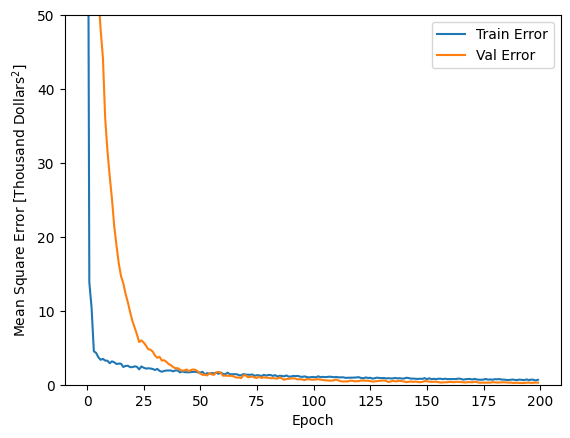

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

ep.plot_history(hist)

10/10 [==============================] - 0s 2ms/step
MSE_train=0.2660610189238777, r2_train=-0.6452310979479416
MSE_test=0.29159735576658224, r2_test=-0.921265227115573


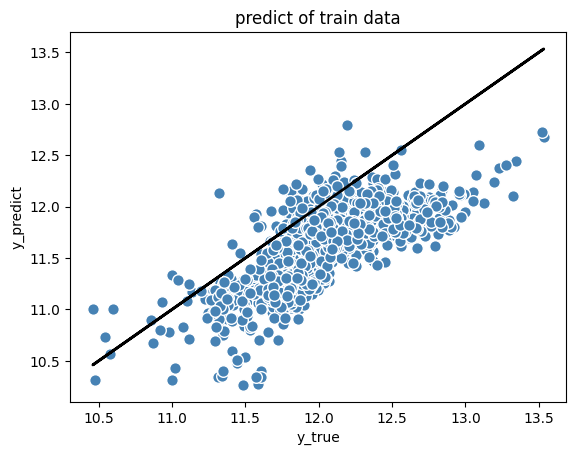

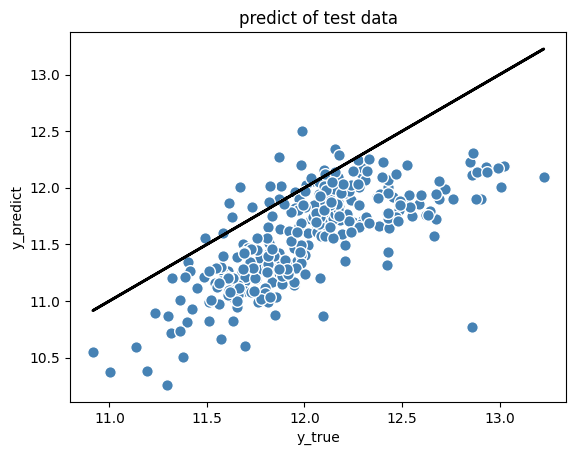

In [13]:
eva_class = ep.evaluation_show(X_train, y_train, X_valid, y_valid, model)
eva_class.show_result()

## keras_tunerでのチューニング

In [52]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=16, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(
        layers.Dropout(0.2)
    )
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="mse"
    )
    return model

In [53]:
tuner = RandomSearch(
    build_model,
    max_trials=3,
    executions_per_trial=2,
    overwrite=True
)

tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
X_train.shape

(1165, 13)

In [55]:
y_train.shape

(1165,)

In [56]:
tuner.search(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
272               |?                 |units
0.0001            |?                 |learning_rate

Epoch 1/2
37/37 [==============================] - 0s 3ms/step - loss: 73057.1484 - val_loss: 14982.4473
Epoch 2/2
37/37 [==============================] - 0s 2ms/step - loss: 19350.6875 - val_loss: 2666.3376


TypeError: Expected the return value of HyperModel.fit() to be a single float when `objective` is left unspecified. Recevied return value: <keras.callbacks.History object at 0xffff367226a0> of type <class 'keras.callbacks.History'>.

In [21]:
import imp
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

# NN構成
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
#model.add(Dropout(0, 2))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0, 2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="mean_squared_error",
            optimizer="adam",
            metrics = ['mae', 'mse'])

batch_size = X_train.shape[0]//5
epochs = 10
history = model.fit(X_train, y_train,
                    #batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split = 0.2,
                    verbose=0, 
                    validation_data=(X_valid, y_valid))

y_pred = model.predict(X_valid)
score = log_loss(y_valid, y_pred, eps=1e-7)
print(f"logloss: {score:.4f}")

10/10 [==============================] - 0s 523us/step


ValueError: Unknown label type: (411     11.884489
211     12.133502
342     11.379394
303     11.917724
159     12.676076
          ...    
92      12.004568
1184    12.137258
295     11.867097
919     12.081076
40      11.982929
Name: SalePrice, Length: 292, dtype: float64,)

In [149]:
eva_class = ep.evaluation_show_pytorch(X_train, y_train, X_valid, y_valid, net)
eva_class.show_result()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### 疑問点・考察
- 線形カーネルを使った場合はCVに30分以上かかったが、rbfカーネルだと1分程度で終わったのはなぜか？
- 非線形回帰(カーネルSVR, ランダムフォレスト回帰)を使ってもあまり性能が良くならなかった。
- 前処理を見直す必要がある？
- 他の非線形モデル（NN, GBDT(XGBegressor)）を使ってみる。